# DQN with modifications ( Acrobot -v1 ) 

In [11]:
import gym
import random
import torch
import numpy as np 
from collections import deque
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Environment - 'Acrobot - v1'

In [12]:
env = gym.make('Acrobot-v1')
env.seed(0)

state_shape = env.observation_space.shape[0]
action_shape = env.action_space.n

print('State shape: ', state_shape)
print('Action shape: ', action_shape)

State shape:  6
Action shape:  3


## Overall DQN Function

In [13]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                 # list containing scores from each episode
    scores_window_printing = deque(maxlen=10) # For printing in the graph
    scores_window= deque(maxlen=100)  # last 100 scores for checking if the avg is more than 195
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores_window_printing.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")  
        if i_episode % 10 == 0: 
            scores.append(np.mean(scores_window_printing))        
        if i_episode % 100 == 0: 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=-80.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            break
    return [np.array(scores),i_episode-100]


# Case 1- (+Q + E + T)

### Neural Network 
Input Layer - 4 nodes (State Shape) \
Hidden Layer 1 - 64 nodes \
Hidden Layer 2 - 64 nodes \
Output Layer - 2 nodes (Action Space) \
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 10 episodes

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (YES)
Gradient is clipped to 1 & -1


In [14]:
from config1 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings1 = 20
sibling_scores1 = []
sibling_lives1 = np.zeros(no_siblings1)

begin_time1 = datetime.datetime.now()
for i in range(no_siblings1):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives1[i]] = dqn()
    sibling_scores1.append(temp_scores)
  



Episode 100	Average Score: -388.89
Episode 200	Average Score: -179.71
Episode 300	Average Score: -129.38
Episode 400	Average Score: -107.94
Episode 500	Average Score: -101.82
Episode 600	Average Score: -89.627
Episode 700	Average Score: -88.83
Episode 800	Average Score: -93.75
Episode 900	Average Score: -98.990
Episode 1000	Average Score: -87.59
Episode 1100	Average Score: -89.77
Episode 1200	Average Score: -94.64
Episode 1300	Average Score: -91.83
Episode 1400	Average Score: -85.67
Episode 1500	Average Score: -87.72
Episode 1600	Average Score: -88.58
Episode 1700	Average Score: -84.54
Episode 1800	Average Score: -82.69
Episode 1900	Average Score: -82.89
Episode 2000	Average Score: -89.67
Episode 2100	Average Score: -88.76
Episode 2200	Average Score: -84.72
Episode 2300	Average Score: -86.49
Episode 2400	Average Score: -84.47
Episode 2500	Average Score: -80.36
Episode 2504	Average Score: -80.00
Environment solved in 2404 episodes!	Average Score: -80.00
Episode 100	Average Score: -372.3

Episode 100	Average Score: -382.83
Episode 200	Average Score: -164.83
Episode 300	Average Score: -123.43
Episode 400	Average Score: -110.50
Episode 500	Average Score: -96.281
Episode 600	Average Score: -93.31
Episode 700	Average Score: -93.41
Episode 800	Average Score: -87.50
Episode 900	Average Score: -92.31
Episode 1000	Average Score: -88.18
Episode 1100	Average Score: -86.87
Episode 1200	Average Score: -83.09
Episode 1300	Average Score: -89.70
Episode 1400	Average Score: -85.56
Episode 1500	Average Score: -87.20
Episode 1600	Average Score: -88.52
Episode 1700	Average Score: -90.57
Episode 1800	Average Score: -87.46
Episode 1900	Average Score: -89.41
Episode 2000	Average Score: -87.87
Episode 2100	Average Score: -86.30
Episode 2200	Average Score: -93.98
Episode 2300	Average Score: -92.52
Episode 2400	Average Score: -88.02
Episode 2500	Average Score: -85.88
Episode 2600	Average Score: -81.69
Episode 2700	Average Score: -82.42
Episode 2739	Average Score: -79.72
Environment solved in 26

Episode 800	Average Score: -94.571
Episode 900	Average Score: -89.01
Episode 1000	Average Score: -87.54
Episode 1100	Average Score: -93.90
Episode 1200	Average Score: -88.47
Episode 1300	Average Score: -86.06
Episode 1400	Average Score: -86.96
Episode 1500	Average Score: -90.15
Episode 1600	Average Score: -87.78
Episode 1700	Average Score: -86.11
Episode 1800	Average Score: -90.39
Episode 1900	Average Score: -84.37
Episode 2000	Average Score: -89.82
Episode 2100	Average Score: -85.39
Episode 2200	Average Score: -93.10
Episode 2300	Average Score: -84.65
Episode 2400	Average Score: -83.22
Episode 2500	Average Score: -84.50
Episode 2600	Average Score: -87.54
Episode 2700	Average Score: -92.45
Episode 2800	Average Score: -93.62
Episode 2900	Average Score: -89.48
Episode 3000	Average Score: -87.82
Episode 3100	Average Score: -88.83
Episode 3200	Average Score: -86.08
Episode 3300	Average Score: -84.67
Episode 3400	Average Score: -84.02
Episode 3500	Average Score: -84.59
Episode 3600	Average 

NameError: name 'begin_time' is not defined

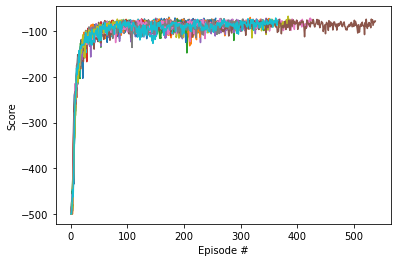

2837.45
990.4248318272316
5:17:05.098372


In [15]:
time_taken1 = datetime.datetime.now() - begin_time1

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings1):
    plt.plot(np.arange(len(sibling_scores1[i])), sibling_scores1[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives1))
print(np.std(sibling_lives1))
print(time_taken1)

# Case 2- (+Q + E - T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 10 episodes

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (NO)
No Gradient clipping present

In [16]:
from config2 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings2 = 20
sibling_scores2 = []
sibling_lives2 = np.zeros(no_siblings1)


begin_time = datetime.datetime.now()
for i in range(no_siblings2):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives2[i]] = dqn()
    sibling_scores2.append(temp_scores)
    
time_taken2 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -376.61
Episode 200	Average Score: -166.14
Episode 300	Average Score: -123.84
Episode 400	Average Score: -107.69
Episode 500	Average Score: -103.07
Episode 600	Average Score: -96.995
Episode 700	Average Score: -93.61
Episode 800	Average Score: -90.76
Episode 900	Average Score: -89.04
Episode 1000	Average Score: -85.28
Episode 1100	Average Score: -88.74
Episode 1200	Average Score: -85.69
Episode 1300	Average Score: -85.45
Episode 1400	Average Score: -86.25
Episode 1500	Average Score: -87.38
Episode 1600	Average Score: -87.21
Episode 1700	Average Score: -82.62
Episode 1800	Average Score: -87.99
Episode 1900	Average Score: -84.93
Episode 2000	Average Score: -86.74
Episode 2100	Average Score: -82.37
Episode 2200	Average Score: -83.21
Episode 2300	Average Score: -87.77
Episode 2400	Average Score: -83.56
Episode 2500	Average Score: -81.83
Episode 2600	Average Score: -85.69
Episode 2700	Average Score: -84.30
Episode 2800	Average Score: -80.68
Episode 2900	Average Sc

Episode 3200	Average Score: -85.89
Episode 3300	Average Score: -89.01
Episode 3400	Average Score: -89.52
Episode 3500	Average Score: -86.87
Episode 3600	Average Score: -91.98
Episode 3700	Average Score: -86.54
Episode 3800	Average Score: -85.80
Episode 3900	Average Score: -84.10
Episode 4000	Average Score: -88.37
Episode 4100	Average Score: -88.13
Episode 4200	Average Score: -88.25
Episode 4300	Average Score: -89.47
Episode 4400	Average Score: -90.68
Episode 4500	Average Score: -83.88
Episode 4600	Average Score: -87.45
Episode 4700	Average Score: -87.27
Episode 4800	Average Score: -84.50
Episode 4900	Average Score: -84.40
Episode 5000	Average Score: -89.11
Episode 5100	Average Score: -85.87
Episode 5200	Average Score: -84.55
Episode 5300	Average Score: -84.97
Episode 5400	Average Score: -85.14
Episode 5500	Average Score: -89.28
Episode 5600	Average Score: -90.25
Episode 5700	Average Score: -86.46
Episode 5800	Average Score: -88.38
Episode 5900	Average Score: -87.52
Episode 6000	Average

Episode 3500	Average Score: -81.74
Episode 3600	Average Score: -84.54
Episode 3700	Average Score: -85.60
Episode 3800	Average Score: -82.52
Episode 3900	Average Score: -84.01
Episode 4000	Average Score: -80.52
Episode 4008	Average Score: -79.84
Environment solved in 3908 episodes!	Average Score: -79.84
Episode 100	Average Score: -356.29
Episode 200	Average Score: -158.09
Episode 300	Average Score: -122.84
Episode 400	Average Score: -110.64
Episode 500	Average Score: -104.90
Episode 600	Average Score: -91.511
Episode 700	Average Score: -96.94
Episode 800	Average Score: -93.57
Episode 900	Average Score: -89.72
Episode 1000	Average Score: -84.18
Episode 1100	Average Score: -87.56
Episode 1200	Average Score: -86.93
Episode 1300	Average Score: -88.23
Episode 1400	Average Score: -87.07
Episode 1500	Average Score: -87.73
Episode 1600	Average Score: -88.76
Episode 1700	Average Score: -90.64
Episode 1800	Average Score: -85.38
Episode 1900	Average Score: -90.54
Episode 2000	Average Score: -93.03

Episode 1500	Average Score: -85.39
Episode 1600	Average Score: -90.02
Episode 1700	Average Score: -84.97
Episode 1800	Average Score: -86.23
Episode 1900	Average Score: -83.78
Episode 2000	Average Score: -90.30
Episode 2100	Average Score: -89.07
Episode 2200	Average Score: -85.04
Episode 2300	Average Score: -89.39
Episode 2400	Average Score: -86.20
Episode 2500	Average Score: -88.66
Episode 2600	Average Score: -88.32
Episode 2700	Average Score: -83.76
Episode 2800	Average Score: -87.42
Episode 2900	Average Score: -84.43
Episode 3000	Average Score: -82.40
Episode 3100	Average Score: -84.18
Episode 3200	Average Score: -87.76
Episode 3300	Average Score: -83.80
Episode 3400	Average Score: -81.47
Episode 3449	Average Score: -79.92
Environment solved in 3349 episodes!	Average Score: -79.92
Episode 100	Average Score: -366.67
Episode 200	Average Score: -174.64
Episode 300	Average Score: -118.91
Episode 400	Average Score: -110.00
Episode 500	Average Score: -102.82
Episode 600	Average Score: -101

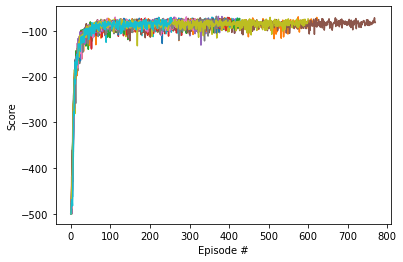

3978.5
1271.5040896513074
6:38:48.584332


In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings2):
    plt.plot(np.arange(len(sibling_scores2[i])), sibling_scores2[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives2))
print(np.std(sibling_lives2))
print(time_taken2)

# Case 3- (+Q -E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (NO)
No Experience Replay / Experience Replay of Size 1

### Loss Clipping (YES)
Gradient is clipped to 1 & -1

In [18]:
from config3 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings3 = 20
sibling_scores3 = []
sibling_lives3 = np.zeros(no_siblings3)

begin_time = datetime.datetime.now()
for i in range(no_siblings3):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives3[i]] = dqn()
    sibling_scores3.append(temp_scores)
   
time_taken3 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -409.30
Episode 200	Average Score: -203.64
Episode 300	Average Score: -160.97
Episode 400	Average Score: -131.36
Episode 500	Average Score: -134.36
Episode 600	Average Score: -128.90
Episode 700	Average Score: -133.84
Episode 800	Average Score: -134.03
Episode 900	Average Score: -134.26
Episode 1000	Average Score: -137.85
Episode 1100	Average Score: -144.24
Episode 1200	Average Score: -122.67
Episode 1300	Average Score: -159.26
Episode 1400	Average Score: -157.56
Episode 1500	Average Score: -130.98
Episode 1600	Average Score: -171.91
Episode 1700	Average Score: -134.74
Episode 1800	Average Score: -168.38
Episode 1900	Average Score: -174.53
Episode 2000	Average Score: -138.27
Episode 2100	Average Score: -134.27
Episode 2200	Average Score: -110.07
Episode 2300	Average Score: -109.36
Episode 2400	Average Score: -145.37
Episode 2500	Average Score: -147.78
Episode 2600	Average Score: -155.20
Episode 2700	Average Score: -133.05
Episode 2800	Average Score: -127.28
E

Episode 2900	Average Score: -134.21
Episode 3000	Average Score: -127.57
Episode 3100	Average Score: -128.34
Episode 3200	Average Score: -134.85
Episode 3300	Average Score: -131.95
Episode 3400	Average Score: -151.79
Episode 3500	Average Score: -143.76
Episode 3600	Average Score: -126.02
Episode 3700	Average Score: -150.08
Episode 3800	Average Score: -143.80
Episode 3900	Average Score: -137.15
Episode 4000	Average Score: -139.59
Episode 4100	Average Score: -146.23
Episode 4200	Average Score: -135.65
Episode 4300	Average Score: -120.89
Episode 4400	Average Score: -149.78
Episode 4500	Average Score: -132.66
Episode 4600	Average Score: -155.50
Episode 4700	Average Score: -168.47
Episode 4800	Average Score: -186.85
Episode 4900	Average Score: -160.20
Episode 5000	Average Score: -166.47
Episode 5100	Average Score: -166.76
Episode 5200	Average Score: -145.21
Episode 5300	Average Score: -169.44
Episode 5400	Average Score: -148.58
Episode 5500	Average Score: -158.03
Episode 5600	Average Score: 

Episode 5700	Average Score: -143.80
Episode 5800	Average Score: -144.16
Episode 5900	Average Score: -149.98
Episode 6000	Average Score: -163.23
Episode 6100	Average Score: -139.69
Episode 6200	Average Score: -119.11
Episode 6300	Average Score: -161.23
Episode 6400	Average Score: -180.63
Episode 6500	Average Score: -178.08
Episode 6600	Average Score: -165.35
Episode 6700	Average Score: -189.43
Episode 6800	Average Score: -173.42
Episode 6900	Average Score: -165.53
Episode 7000	Average Score: -165.32
Episode 7100	Average Score: -120.56
Episode 7200	Average Score: -166.23
Episode 7300	Average Score: -142.46
Episode 7400	Average Score: -162.10
Episode 7500	Average Score: -153.87
Episode 7600	Average Score: -151.45
Episode 7700	Average Score: -167.62
Episode 7800	Average Score: -210.79
Episode 7900	Average Score: -152.63
Episode 8000	Average Score: -131.67
Episode 8100	Average Score: -159.06
Episode 8200	Average Score: -172.92
Episode 8300	Average Score: -159.40
Episode 8400	Average Score: 

Episode 8500	Average Score: -182.00
Episode 8600	Average Score: -172.81
Episode 8700	Average Score: -151.03
Episode 8800	Average Score: -174.59
Episode 8900	Average Score: -176.05
Episode 9000	Average Score: -183.15
Episode 9100	Average Score: -218.59
Episode 9200	Average Score: -237.56
Episode 9300	Average Score: -205.06
Episode 9400	Average Score: -179.18
Episode 9500	Average Score: -145.86
Episode 9600	Average Score: -141.28
Episode 9700	Average Score: -172.46
Episode 9800	Average Score: -159.08
Episode 9900	Average Score: -148.59
Episode 10000	Average Score: -122.38
Episode 100	Average Score: -402.89
Episode 200	Average Score: -188.37
Episode 300	Average Score: -169.54
Episode 400	Average Score: -143.45
Episode 500	Average Score: -120.06
Episode 600	Average Score: -124.53
Episode 700	Average Score: -131.65
Episode 800	Average Score: -130.78
Episode 900	Average Score: -120.40
Episode 1000	Average Score: -132.09
Episode 1100	Average Score: -124.37
Episode 1200	Average Score: -119.65


Episode 1300	Average Score: -129.56
Episode 1400	Average Score: -121.23
Episode 1500	Average Score: -146.76
Episode 1600	Average Score: -126.08
Episode 1700	Average Score: -142.49
Episode 1800	Average Score: -167.09
Episode 1900	Average Score: -160.80
Episode 2000	Average Score: -155.93
Episode 2100	Average Score: -128.76
Episode 2200	Average Score: -137.72
Episode 2300	Average Score: -130.39
Episode 2400	Average Score: -140.61
Episode 2500	Average Score: -130.45
Episode 2600	Average Score: -138.55
Episode 2700	Average Score: -123.88
Episode 2800	Average Score: -150.07
Episode 2900	Average Score: -131.12
Episode 3000	Average Score: -135.29
Episode 3100	Average Score: -145.40
Episode 3200	Average Score: -129.59
Episode 3300	Average Score: -167.04
Episode 3400	Average Score: -139.64
Episode 3500	Average Score: -127.27
Episode 3600	Average Score: -135.16
Episode 3700	Average Score: -164.17
Episode 3800	Average Score: -154.68
Episode 3900	Average Score: -154.01
Episode 4000	Average Score: 

Episode 4100	Average Score: -143.79
Episode 4200	Average Score: -140.15
Episode 4300	Average Score: -148.67
Episode 4400	Average Score: -141.27
Episode 4500	Average Score: -152.70
Episode 4600	Average Score: -187.25
Episode 4700	Average Score: -141.61
Episode 4800	Average Score: -128.16
Episode 4900	Average Score: -140.24
Episode 5000	Average Score: -175.62
Episode 5100	Average Score: -155.46
Episode 5200	Average Score: -140.68
Episode 5300	Average Score: -142.82
Episode 5400	Average Score: -124.92
Episode 5500	Average Score: -137.15
Episode 5600	Average Score: -145.25
Episode 5700	Average Score: -141.53
Episode 5800	Average Score: -151.44
Episode 5900	Average Score: -166.70
Episode 6000	Average Score: -187.45
Episode 6100	Average Score: -133.86
Episode 6200	Average Score: -136.21
Episode 6300	Average Score: -139.54
Episode 6400	Average Score: -145.26
Episode 6500	Average Score: -190.70
Episode 6600	Average Score: -135.52
Episode 6700	Average Score: -189.28
Episode 6800	Average Score: 

Episode 6900	Average Score: -146.37
Episode 7000	Average Score: -177.09
Episode 7100	Average Score: -121.97
Episode 7200	Average Score: -131.47
Episode 7300	Average Score: -158.49
Episode 7400	Average Score: -154.04
Episode 7500	Average Score: -149.01
Episode 7600	Average Score: -165.97
Episode 7700	Average Score: -162.90
Episode 7800	Average Score: -153.16
Episode 7900	Average Score: -161.11
Episode 8000	Average Score: -132.13
Episode 8100	Average Score: -173.15
Episode 8200	Average Score: -170.69
Episode 8300	Average Score: -164.09
Episode 8400	Average Score: -139.22
Episode 8500	Average Score: -137.34
Episode 8600	Average Score: -124.40
Episode 8700	Average Score: -162.30
Episode 8800	Average Score: -152.86
Episode 8900	Average Score: -183.23
Episode 9000	Average Score: -163.80
Episode 9100	Average Score: -176.12
Episode 9200	Average Score: -186.92
Episode 9300	Average Score: -196.24
Episode 9400	Average Score: -155.52
Episode 9500	Average Score: -178.39
Episode 9600	Average Score: 

Episode 9700	Average Score: -182.34
Episode 9800	Average Score: -169.11
Episode 9900	Average Score: -165.46
Episode 10000	Average Score: -175.71
Episode 100	Average Score: -400.73
Episode 200	Average Score: -197.37
Episode 300	Average Score: -162.24
Episode 400	Average Score: -144.67
Episode 500	Average Score: -137.40
Episode 600	Average Score: -134.33
Episode 700	Average Score: -131.21
Episode 800	Average Score: -147.51
Episode 900	Average Score: -111.21
Episode 1000	Average Score: -134.67
Episode 1100	Average Score: -127.57
Episode 1200	Average Score: -126.82
Episode 1300	Average Score: -119.54
Episode 1400	Average Score: -115.94
Episode 1500	Average Score: -150.60
Episode 1600	Average Score: -158.77
Episode 1700	Average Score: -158.36
Episode 1800	Average Score: -168.75
Episode 1900	Average Score: -138.05
Episode 2000	Average Score: -124.91
Episode 2100	Average Score: -162.72
Episode 2200	Average Score: -140.41
Episode 2300	Average Score: -132.77
Episode 2400	Average Score: -146.08


Episode 2500	Average Score: -121.35
Episode 2600	Average Score: -147.69
Episode 2700	Average Score: -127.92
Episode 2800	Average Score: -142.08
Episode 2900	Average Score: -146.42
Episode 3000	Average Score: -121.93
Episode 3100	Average Score: -136.76
Episode 3200	Average Score: -158.62
Episode 3300	Average Score: -149.75
Episode 3400	Average Score: -156.22
Episode 3500	Average Score: -145.31
Episode 3600	Average Score: -126.56
Episode 3700	Average Score: -148.19
Episode 3800	Average Score: -157.03
Episode 3900	Average Score: -145.48
Episode 4000	Average Score: -133.75
Episode 4100	Average Score: -141.87
Episode 4200	Average Score: -119.12
Episode 4300	Average Score: -128.51
Episode 4400	Average Score: -124.76
Episode 4500	Average Score: -153.40
Episode 4600	Average Score: -141.80
Episode 4700	Average Score: -111.32
Episode 4800	Average Score: -132.66
Episode 4900	Average Score: -126.31
Episode 5000	Average Score: -131.47
Episode 5100	Average Score: -150.50
Episode 5200	Average Score: 

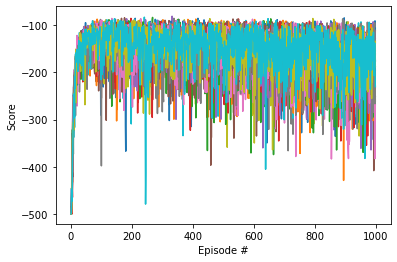

9900.0
0.0
23:15:20.432012


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings3):
    plt.plot(np.arange(len(sibling_scores3[i])), sibling_scores3[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives3))
print(np.std(sibling_lives3))
print(time_taken3)

# Case 4- (+Q -E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (YES)
Frequency of network switch - Every 5 episodes

###  Experience Replay (NO)
No Experience Replay / Experience Replay of Size 1

### Loss Clipping (NO)
No Gradient clipping present

In [21]:
from config4 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings4 = 20
sibling_scores4 = []
sibling_lives4 = np.zeros(no_siblings4)

begin_time = datetime.datetime.now()
for i in range(no_siblings4):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives4[i]] = dqn()
    sibling_scores4.append(temp_scores)
   
time_taken4 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -447.24
Episode 200	Average Score: -220.94
Episode 300	Average Score: -169.78
Episode 400	Average Score: -150.31
Episode 500	Average Score: -150.57
Episode 600	Average Score: -129.88
Episode 700	Average Score: -124.24
Episode 800	Average Score: -127.91
Episode 900	Average Score: -114.20
Episode 1000	Average Score: -132.36
Episode 1100	Average Score: -127.64
Episode 1200	Average Score: -122.73
Episode 1300	Average Score: -128.93
Episode 1400	Average Score: -127.47
Episode 1500	Average Score: -128.47
Episode 1600	Average Score: -133.84
Episode 1700	Average Score: -117.77
Episode 1800	Average Score: -127.57
Episode 1900	Average Score: -112.18
Episode 2000	Average Score: -127.71
Episode 2100	Average Score: -137.92
Episode 2200	Average Score: -122.83
Episode 2300	Average Score: -137.64
Episode 2400	Average Score: -107.55
Episode 2500	Average Score: -114.13
Episode 2600	Average Score: -109.12
Episode 2700	Average Score: -122.47
Episode 2800	Average Score: -110.67
E

Episode 2900	Average Score: -119.22
Episode 3000	Average Score: -108.90
Episode 3100	Average Score: -123.66
Episode 3200	Average Score: -118.48
Episode 3300	Average Score: -112.90
Episode 3400	Average Score: -116.03
Episode 3500	Average Score: -112.45
Episode 3600	Average Score: -118.23
Episode 3700	Average Score: -110.12
Episode 3800	Average Score: -130.81
Episode 3900	Average Score: -114.74
Episode 4000	Average Score: -137.12
Episode 4100	Average Score: -122.68
Episode 4200	Average Score: -145.75
Episode 4300	Average Score: -136.30
Episode 4400	Average Score: -117.25
Episode 4500	Average Score: -117.72
Episode 4600	Average Score: -115.42
Episode 4700	Average Score: -117.08
Episode 4800	Average Score: -108.43
Episode 4900	Average Score: -126.14
Episode 5000	Average Score: -124.25
Episode 5100	Average Score: -111.25
Episode 5200	Average Score: -115.55
Episode 5300	Average Score: -114.00
Episode 5400	Average Score: -117.44
Episode 5500	Average Score: -131.42
Episode 5600	Average Score: 

Episode 5700	Average Score: -109.81
Episode 5800	Average Score: -115.61
Episode 5900	Average Score: -115.82
Episode 6000	Average Score: -121.38
Episode 6100	Average Score: -110.17
Episode 6200	Average Score: -127.47
Episode 6300	Average Score: -115.81
Episode 6400	Average Score: -110.10
Episode 6500	Average Score: -114.23
Episode 6600	Average Score: -117.35
Episode 6700	Average Score: -116.34
Episode 6800	Average Score: -120.15
Episode 6900	Average Score: -113.93
Episode 7000	Average Score: -132.27
Episode 7100	Average Score: -111.42
Episode 7200	Average Score: -108.04
Episode 7300	Average Score: -138.41
Episode 7400	Average Score: -121.67
Episode 7500	Average Score: -116.15
Episode 7600	Average Score: -126.32
Episode 7700	Average Score: -128.69
Episode 7800	Average Score: -115.13
Episode 7900	Average Score: -140.55
Episode 8000	Average Score: -115.08
Episode 8100	Average Score: -117.76
Episode 8200	Average Score: -112.24
Episode 8300	Average Score: -112.42
Episode 8400	Average Score: 

Episode 8500	Average Score: -126.89
Episode 8600	Average Score: -119.91
Episode 8700	Average Score: -127.89
Episode 8800	Average Score: -114.38
Episode 8900	Average Score: -142.24
Episode 9000	Average Score: -120.03
Episode 9100	Average Score: -121.39
Episode 9200	Average Score: -112.62
Episode 9300	Average Score: -111.71
Episode 9400	Average Score: -122.46
Episode 9500	Average Score: -115.55
Episode 9600	Average Score: -132.17
Episode 9700	Average Score: -130.76
Episode 9800	Average Score: -130.90
Episode 9900	Average Score: -117.18
Episode 10000	Average Score: -122.85
Episode 100	Average Score: -382.20
Episode 200	Average Score: -209.25
Episode 300	Average Score: -171.72
Episode 400	Average Score: -138.96
Episode 500	Average Score: -126.48
Episode 600	Average Score: -134.63
Episode 700	Average Score: -140.94
Episode 800	Average Score: -122.46
Episode 900	Average Score: -141.08
Episode 1000	Average Score: -123.59
Episode 1100	Average Score: -133.32
Episode 1200	Average Score: -126.87


Episode 1300	Average Score: -118.18
Episode 1400	Average Score: -120.89
Episode 1500	Average Score: -142.40
Episode 1600	Average Score: -125.37
Episode 1700	Average Score: -121.73
Episode 1800	Average Score: -131.80
Episode 1900	Average Score: -122.40
Episode 2000	Average Score: -134.17
Episode 2100	Average Score: -125.34
Episode 2200	Average Score: -258.73
Episode 2300	Average Score: -113.42
Episode 2400	Average Score: -123.31
Episode 2500	Average Score: -114.13
Episode 2600	Average Score: -110.85
Episode 2700	Average Score: -114.94
Episode 2800	Average Score: -117.17
Episode 2900	Average Score: -108.41
Episode 3000	Average Score: -138.73
Episode 3100	Average Score: -129.70
Episode 3200	Average Score: -113.82
Episode 3300	Average Score: -109.97
Episode 3400	Average Score: -116.82
Episode 3500	Average Score: -113.05
Episode 3600	Average Score: -125.32
Episode 3700	Average Score: -125.25
Episode 3800	Average Score: -124.33
Episode 3900	Average Score: -114.82
Episode 4000	Average Score: 

Episode 4100	Average Score: -121.03
Episode 4200	Average Score: -106.68
Episode 4300	Average Score: -111.76
Episode 4400	Average Score: -117.79
Episode 4500	Average Score: -118.74
Episode 4600	Average Score: -104.40
Episode 4700	Average Score: -115.47
Episode 4800	Average Score: -117.68
Episode 4900	Average Score: -115.20
Episode 5000	Average Score: -121.96
Episode 5100	Average Score: -131.83
Episode 5200	Average Score: -114.99
Episode 5300	Average Score: -109.71
Episode 5400	Average Score: -114.28
Episode 5500	Average Score: -120.34
Episode 5600	Average Score: -126.28
Episode 5700	Average Score: -116.72
Episode 5800	Average Score: -122.09
Episode 5900	Average Score: -113.53
Episode 6000	Average Score: -111.21
Episode 6100	Average Score: -127.64
Episode 6200	Average Score: -114.52
Episode 6300	Average Score: -105.61
Episode 6400	Average Score: -118.00
Episode 6500	Average Score: -128.49
Episode 6600	Average Score: -114.62
Episode 6700	Average Score: -127.58
Episode 6800	Average Score: 

Episode 6900	Average Score: -124.15
Episode 7000	Average Score: -124.61
Episode 7100	Average Score: -134.16
Episode 7200	Average Score: -124.97
Episode 7300	Average Score: -112.97
Episode 7400	Average Score: -120.30
Episode 7500	Average Score: -127.53
Episode 7600	Average Score: -131.48
Episode 7700	Average Score: -129.94
Episode 7800	Average Score: -122.10
Episode 7900	Average Score: -125.17
Episode 8000	Average Score: -119.67
Episode 8100	Average Score: -130.54
Episode 8200	Average Score: -114.79
Episode 8300	Average Score: -120.45
Episode 8400	Average Score: -113.18
Episode 8500	Average Score: -112.15
Episode 8600	Average Score: -120.56
Episode 8700	Average Score: -114.90
Episode 8800	Average Score: -112.15
Episode 8900	Average Score: -116.77
Episode 9000	Average Score: -115.48
Episode 9100	Average Score: -123.03
Episode 9200	Average Score: -120.70
Episode 9300	Average Score: -126.05
Episode 9400	Average Score: -121.82
Episode 9500	Average Score: -124.62
Episode 9600	Average Score: 

Episode 9700	Average Score: -135.11
Episode 9800	Average Score: -118.31
Episode 9900	Average Score: -128.67
Episode 10000	Average Score: -117.05
Episode 100	Average Score: -406.76
Episode 200	Average Score: -208.37
Episode 300	Average Score: -163.92
Episode 400	Average Score: -154.94
Episode 500	Average Score: -142.40
Episode 600	Average Score: -146.18
Episode 700	Average Score: -150.92
Episode 800	Average Score: -132.17
Episode 900	Average Score: -119.50
Episode 1000	Average Score: -138.79
Episode 1100	Average Score: -123.72
Episode 1200	Average Score: -116.62
Episode 1300	Average Score: -114.88
Episode 1400	Average Score: -120.84
Episode 1500	Average Score: -120.07
Episode 1600	Average Score: -119.34
Episode 1700	Average Score: -111.57
Episode 1800	Average Score: -124.04
Episode 1900	Average Score: -118.86
Episode 2000	Average Score: -111.09
Episode 2100	Average Score: -115.35
Episode 2200	Average Score: -111.42
Episode 2300	Average Score: -138.46
Episode 2400	Average Score: -132.94


Episode 2500	Average Score: -115.74
Episode 2600	Average Score: -106.52
Episode 2700	Average Score: -110.87
Episode 2800	Average Score: -126.82
Episode 2900	Average Score: -114.21
Episode 3000	Average Score: -134.61
Episode 3100	Average Score: -135.19
Episode 3200	Average Score: -125.12
Episode 3300	Average Score: -123.76
Episode 3400	Average Score: -132.74
Episode 3500	Average Score: -120.88
Episode 3600	Average Score: -115.34
Episode 3700	Average Score: -112.06
Episode 3800	Average Score: -119.28
Episode 3900	Average Score: -119.00
Episode 4000	Average Score: -106.75
Episode 4100	Average Score: -118.99
Episode 4200	Average Score: -125.29
Episode 4300	Average Score: -125.26
Episode 4400	Average Score: -105.27
Episode 4500	Average Score: -102.96
Episode 4600	Average Score: -121.49
Episode 4700	Average Score: -110.82
Episode 4800	Average Score: -117.48
Episode 4900	Average Score: -113.25
Episode 5000	Average Score: -117.18
Episode 5100	Average Score: -106.86
Episode 5200	Average Score: 

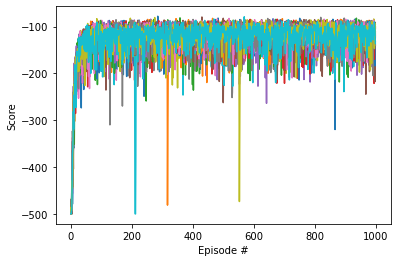

9900.0
0.0
18:13:45.665891


In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings4):
    plt.plot(np.arange(len(sibling_scores4[i])), sibling_scores4[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives4))
print(np.std(sibling_lives4))
print(time_taken4)

# Case 5- (-Q +E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Networks Update Frequency (NO)
Frequency of network switch - Every episode

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (YES)
Gradient is clipped to 1 & -1

In [23]:
from config5 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings5 = 20
sibling_scores5 = []
sibling_lives5 = np.zeros(no_siblings5)

begin_time = datetime.datetime.now()
for i in range(no_siblings5):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives5[i]] = dqn()
    sibling_scores5.append(temp_scores)
   
time_taken5 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -393.31
Episode 200	Average Score: -188.32
Episode 300	Average Score: -139.76
Episode 400	Average Score: -121.76
Episode 500	Average Score: -108.28
Episode 600	Average Score: -99.523
Episode 700	Average Score: -99.200
Episode 800	Average Score: -100.56
Episode 900	Average Score: -105.87
Episode 1000	Average Score: -100.80
Episode 1100	Average Score: -98.529
Episode 1200	Average Score: -101.08
Episode 1300	Average Score: -104.24
Episode 1400	Average Score: -101.30
Episode 1500	Average Score: -102.73
Episode 1600	Average Score: -106.91
Episode 1700	Average Score: -99.413
Episode 1800	Average Score: -98.270
Episode 1900	Average Score: -94.59
Episode 2000	Average Score: -90.38
Episode 2100	Average Score: -88.88
Episode 2200	Average Score: -91.64
Episode 2300	Average Score: -93.92
Episode 2400	Average Score: -86.40
Episode 2500	Average Score: -91.73
Episode 2600	Average Score: -90.74
Episode 2700	Average Score: -87.32
Episode 2800	Average Score: -87.16
Episode 290

Episode 1400	Average Score: -92.44
Episode 1500	Average Score: -93.66
Episode 1600	Average Score: -94.75
Episode 1700	Average Score: -93.82
Episode 1800	Average Score: -99.70
Episode 1900	Average Score: -97.40
Episode 2000	Average Score: -96.904
Episode 2100	Average Score: -92.88
Episode 2200	Average Score: -98.919
Episode 2300	Average Score: -97.69
Episode 2400	Average Score: -99.838
Episode 2500	Average Score: -101.66
Episode 2600	Average Score: -101.24
Episode 2700	Average Score: -96.085
Episode 2800	Average Score: -102.77
Episode 2900	Average Score: -91.829
Episode 3000	Average Score: -91.19
Episode 3100	Average Score: -94.83
Episode 3200	Average Score: -92.62
Episode 3300	Average Score: -97.51
Episode 3400	Average Score: -96.93
Episode 3500	Average Score: -94.607
Episode 3600	Average Score: -101.34
Episode 3700	Average Score: -98.143
Episode 3800	Average Score: -97.97
Episode 3900	Average Score: -99.569
Episode 4000	Average Score: -98.103
Episode 4100	Average Score: -98.24
Episode

Episode 4600	Average Score: -86.82
Episode 4700	Average Score: -92.66
Episode 4800	Average Score: -90.04
Episode 4900	Average Score: -93.76
Episode 5000	Average Score: -90.74
Episode 5100	Average Score: -96.82
Episode 5200	Average Score: -95.75
Episode 5300	Average Score: -99.39
Episode 5400	Average Score: -90.06
Episode 5500	Average Score: -89.96
Episode 5600	Average Score: -89.29
Episode 5700	Average Score: -85.85
Episode 5800	Average Score: -82.36
Episode 5900	Average Score: -87.77
Episode 6000	Average Score: -80.90
Episode 6100	Average Score: -85.76
Episode 6200	Average Score: -86.32
Episode 6300	Average Score: -84.67
Episode 6400	Average Score: -87.37
Episode 6500	Average Score: -85.89
Episode 6600	Average Score: -90.25
Episode 6700	Average Score: -88.04
Episode 6800	Average Score: -89.52
Episode 6900	Average Score: -82.69
Episode 7000	Average Score: -84.40
Episode 7100	Average Score: -87.12
Episode 7200	Average Score: -85.06
Episode 7300	Average Score: -90.31
Episode 7400	Average

Episode 1400	Average Score: -94.49
Episode 1500	Average Score: -93.23
Episode 1600	Average Score: -95.17
Episode 1700	Average Score: -103.36
Episode 1800	Average Score: -96.154
Episode 1900	Average Score: -94.35
Episode 2000	Average Score: -91.82
Episode 2100	Average Score: -92.49
Episode 2200	Average Score: -96.37
Episode 2300	Average Score: -89.62
Episode 2400	Average Score: -97.55
Episode 2500	Average Score: -95.82
Episode 2600	Average Score: -90.12
Episode 2700	Average Score: -93.25
Episode 2800	Average Score: -94.34
Episode 2900	Average Score: -94.98
Episode 3000	Average Score: -96.38
Episode 3100	Average Score: -87.94
Episode 3200	Average Score: -92.41
Episode 3300	Average Score: -92.24
Episode 3400	Average Score: -93.25
Episode 3500	Average Score: -91.51
Episode 3600	Average Score: -102.30
Episode 3700	Average Score: -98.177
Episode 3800	Average Score: -96.181
Episode 3900	Average Score: -99.021
Episode 4000	Average Score: -103.40
Episode 4100	Average Score: -105.41
Episode 4200

Episode 4100	Average Score: -88.14
Episode 4200	Average Score: -83.02
Episode 4300	Average Score: -85.08
Episode 4400	Average Score: -81.75
Episode 4430	Average Score: -79.60
Environment solved in 4330 episodes!	Average Score: -79.60
Episode 100	Average Score: -374.14
Episode 200	Average Score: -176.27
Episode 300	Average Score: -126.80
Episode 400	Average Score: -114.35
Episode 500	Average Score: -102.18
Episode 600	Average Score: -108.74
Episode 700	Average Score: -114.26
Episode 800	Average Score: -100.34
Episode 900	Average Score: -102.39
Episode 1000	Average Score: -99.16
Episode 1100	Average Score: -103.85
Episode 1200	Average Score: -97.445
Episode 1300	Average Score: -99.53
Episode 1400	Average Score: -103.88
Episode 1500	Average Score: -99.481
Episode 1600	Average Score: -103.67
Episode 1700	Average Score: -102.41
Episode 1800	Average Score: -95.486
Episode 1900	Average Score: -99.771
Episode 2000	Average Score: -90.125
Episode 2100	Average Score: -91.09
Episode 2200	Average S

Episode 200	Average Score: -176.40
Episode 300	Average Score: -127.38
Episode 400	Average Score: -107.58
Episode 500	Average Score: -97.242
Episode 600	Average Score: -95.04
Episode 700	Average Score: -99.52
Episode 800	Average Score: -98.47
Episode 900	Average Score: -94.27
Episode 1000	Average Score: -96.57
Episode 1100	Average Score: -101.01
Episode 1200	Average Score: -100.84
Episode 1300	Average Score: -103.77
Episode 1400	Average Score: -92.788
Episode 1500	Average Score: -91.55
Episode 1600	Average Score: -90.57
Episode 1700	Average Score: -88.35
Episode 1800	Average Score: -90.62
Episode 1900	Average Score: -88.04
Episode 2000	Average Score: -89.54
Episode 2100	Average Score: -88.65
Episode 2200	Average Score: -90.89
Episode 2300	Average Score: -95.16
Episode 2400	Average Score: -94.64
Episode 2500	Average Score: -96.17
Episode 2600	Average Score: -92.89
Episode 2700	Average Score: -90.93
Episode 2800	Average Score: -90.67
Episode 2900	Average Score: -85.04
Episode 3000	Average

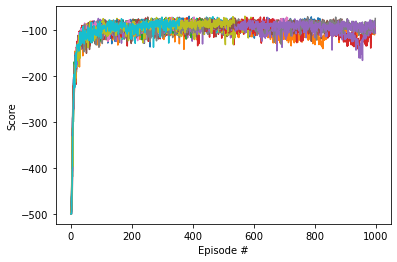

6461.2
2432.3824658141243
12:14:57.889421


In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings5):
    plt.plot(np.arange(len(sibling_scores5[i])), sibling_scores5[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives5))
print(np.std(sibling_lives5))
print(time_taken5)

# Case 6: (-Q +E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency (NO)
Frequency of network switch - Every episode

###  Experience Replay (YES)
Total Replay Buffer Size - 10,000
Mini Batch Size - 64

### Loss Clipping (NO)
No Gradient clipping present

In [25]:
from config6 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings6 = 20
sibling_scores6 = []
sibling_lives6 = np.zeros(no_siblings6)

begin_time = datetime.datetime.now()
for i in range(no_siblings6):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives6[i]] = dqn()
    sibling_scores6.append(temp_scores)

time_taken6 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -374.57
Episode 200	Average Score: -185.55
Episode 300	Average Score: -133.80
Episode 400	Average Score: -111.22
Episode 500	Average Score: -106.63
Episode 600	Average Score: -104.88
Episode 700	Average Score: -105.80
Episode 800	Average Score: -99.518
Episode 900	Average Score: -95.897
Episode 1000	Average Score: -100.37
Episode 1100	Average Score: -97.595
Episode 1200	Average Score: -101.85
Episode 1300	Average Score: -94.594
Episode 1400	Average Score: -101.17
Episode 1500	Average Score: -100.90
Episode 1600	Average Score: -96.015
Episode 1700	Average Score: -95.67
Episode 1800	Average Score: -93.14
Episode 1900	Average Score: -89.37
Episode 2000	Average Score: -91.40
Episode 2100	Average Score: -92.27
Episode 2200	Average Score: -91.40
Episode 2300	Average Score: -86.08
Episode 2400	Average Score: -89.55
Episode 2500	Average Score: -87.61
Episode 2600	Average Score: -89.69
Episode 2700	Average Score: -93.00
Episode 2800	Average Score: -87.97
Episode 2900	

Episode 1900	Average Score: -91.74
Episode 2000	Average Score: -91.00
Episode 2100	Average Score: -90.70
Episode 2200	Average Score: -88.97
Episode 2300	Average Score: -91.37
Episode 2400	Average Score: -89.55
Episode 2500	Average Score: -88.47
Episode 2600	Average Score: -86.82
Episode 2700	Average Score: -84.03
Episode 2800	Average Score: -84.43
Episode 2900	Average Score: -90.54
Episode 3000	Average Score: -88.72
Episode 3100	Average Score: -87.96
Episode 3200	Average Score: -83.69
Episode 3300	Average Score: -87.69
Episode 3400	Average Score: -88.39
Episode 3500	Average Score: -87.87
Episode 3600	Average Score: -87.89
Episode 3700	Average Score: -87.42
Episode 3800	Average Score: -84.78
Episode 3900	Average Score: -87.28
Episode 4000	Average Score: -84.04
Episode 4100	Average Score: -84.48
Episode 4200	Average Score: -84.31
Episode 4300	Average Score: -83.83
Episode 4400	Average Score: -82.76
Episode 4500	Average Score: -85.51
Episode 4600	Average Score: -80.64
Episode 4700	Average

Episode 1000	Average Score: -97.74
Episode 1100	Average Score: -97.26
Episode 1200	Average Score: -94.60
Episode 1300	Average Score: -92.20
Episode 1400	Average Score: -96.23
Episode 1500	Average Score: -94.46
Episode 1600	Average Score: -97.93
Episode 1700	Average Score: -99.516
Episode 1800	Average Score: -96.223
Episode 1900	Average Score: -92.80
Episode 2000	Average Score: -92.43
Episode 2100	Average Score: -89.23
Episode 2200	Average Score: -90.86
Episode 2300	Average Score: -90.29
Episode 2400	Average Score: -90.54
Episode 2500	Average Score: -89.27
Episode 2600	Average Score: -89.83
Episode 2700	Average Score: -89.66
Episode 2800	Average Score: -88.75
Episode 2900	Average Score: -90.55
Episode 3000	Average Score: -91.94
Episode 3100	Average Score: -87.39
Episode 3200	Average Score: -86.14
Episode 3300	Average Score: -86.27
Episode 3400	Average Score: -88.34
Episode 3500	Average Score: -90.09
Episode 3600	Average Score: -85.45
Episode 3700	Average Score: -88.96
Episode 3800	Avera

Episode 1500	Average Score: -95.558
Episode 1600	Average Score: -97.87
Episode 1700	Average Score: -92.82
Episode 1800	Average Score: -90.12
Episode 1900	Average Score: -87.91
Episode 2000	Average Score: -87.20
Episode 2100	Average Score: -85.31
Episode 2200	Average Score: -88.97
Episode 2300	Average Score: -91.56
Episode 2400	Average Score: -88.63
Episode 2500	Average Score: -89.11
Episode 2600	Average Score: -98.66
Episode 2700	Average Score: -91.35
Episode 2800	Average Score: -91.79
Episode 2900	Average Score: -95.92
Episode 3000	Average Score: -96.77
Episode 3100	Average Score: -92.93
Episode 3200	Average Score: -90.53
Episode 3300	Average Score: -89.02
Episode 3400	Average Score: -87.66
Episode 3500	Average Score: -87.90
Episode 3600	Average Score: -89.09
Episode 3700	Average Score: -87.71
Episode 3800	Average Score: -89.65
Episode 3900	Average Score: -90.01
Episode 4000	Average Score: -88.64
Episode 4100	Average Score: -92.43
Episode 4200	Average Score: -85.52
Episode 4300	Averag

Episode 100	Average Score: -376.93
Episode 200	Average Score: -165.41
Episode 300	Average Score: -132.37
Episode 400	Average Score: -110.13
Episode 500	Average Score: -106.25
Episode 600	Average Score: -101.54
Episode 700	Average Score: -99.204
Episode 800	Average Score: -101.33
Episode 900	Average Score: -100.02
Episode 1000	Average Score: -99.49
Episode 1100	Average Score: -98.729
Episode 1200	Average Score: -97.439
Episode 1300	Average Score: -99.675
Episode 1400	Average Score: -100.53
Episode 1500	Average Score: -95.602
Episode 1600	Average Score: -97.02
Episode 1700	Average Score: -93.96
Episode 1800	Average Score: -92.09
Episode 1900	Average Score: -90.40
Episode 2000	Average Score: -95.65
Episode 2100	Average Score: -91.08
Episode 2200	Average Score: -90.43
Episode 2300	Average Score: -91.67
Episode 2400	Average Score: -91.10
Episode 2500	Average Score: -87.89
Episode 2600	Average Score: -88.19
Episode 2700	Average Score: -85.43
Episode 2800	Average Score: -90.86
Episode 2900	Av

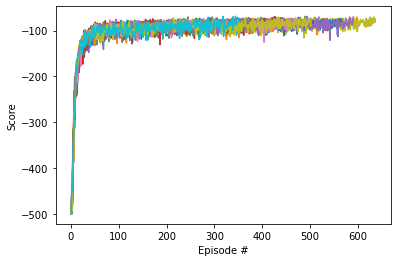

4545.3
896.0968753432857
8:32:56.624868


In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings6):
    plt.plot(np.arange(len(sibling_scores6[i])), sibling_scores6[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives6))
print(np.std(sibling_lives6))
print(time_taken6)

# Case 7: (-Q -E +T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency 
Frequency of network switch - Every episode

###  Experience Replay
No Experience Replay / Experience Replay of Size 1

### Loss Clipping
Gradient is clipped to 1 & -1

In [27]:
from config7 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings7 = 20
sibling_scores7 = []
sibling_lives7 = np.zeros(no_siblings1)

begin_time = datetime.datetime.now()
for i in range(no_siblings7):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives7[i]] = dqn()
    sibling_scores7.append(temp_scores)
   
time_taken7 = datetime.datetime.now() - begin_time

Episode 100	Average Score: -416.50
Episode 200	Average Score: -225.57
Episode 300	Average Score: -174.99
Episode 400	Average Score: -165.57
Episode 500	Average Score: -145.54
Episode 600	Average Score: -124.51
Episode 700	Average Score: -127.26
Episode 800	Average Score: -124.31
Episode 900	Average Score: -122.22
Episode 1000	Average Score: -111.33
Episode 1100	Average Score: -117.70
Episode 1200	Average Score: -121.23
Episode 1300	Average Score: -117.16
Episode 1400	Average Score: -135.64
Episode 1500	Average Score: -131.34
Episode 1600	Average Score: -132.80
Episode 1700	Average Score: -136.65
Episode 1800	Average Score: -127.61
Episode 1900	Average Score: -122.55
Episode 2000	Average Score: -123.74
Episode 2100	Average Score: -148.22
Episode 2200	Average Score: -130.39
Episode 2300	Average Score: -133.46
Episode 2400	Average Score: -147.71
Episode 2500	Average Score: -124.69
Episode 2600	Average Score: -128.05
Episode 2700	Average Score: -139.36
Episode 2800	Average Score: -121.14
E

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings7):
    plt.plot(np.arange(len(sibling_scores[i])), sibling_scores7[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives7))
print(np.std(sibling_lives7))
print(time_taken7)

# Case 8: (-Q -E -T)

### Neural Network 
Input Layer - 4 nodes (State Shape)
Hidden Layer 1 - 64 nodes
Hidden Layer 2 - 64 nodes
Output Layer - 2 nodes (Action Space)
Optimizer - zero_grad()

### Network Update Frequency 
Frequency of network switch - Every episode

###  Experience Replay
No Experience Replay / Experience Replay of Size 1

### Loss Clipping
No Gradient clipping present

In [ ]:
from config8 import Agent

#agent = Agent(state_size=6,action_size = 3,seed = 0)
no_siblings8 = 20
sibling_scores8 = []
sibling_lives8 = np.zeros(no_siblings8)

begin_time = datetime.datetime.now()
for i in range(no_siblings8):
    
    agent = Agent(state_size=state_shape,action_size = action_shape,seed = 0)
    [temp_scores,sibling_lives8[i]] = dqn()
    sibling_scores8.append(temp_scores)
   
time_taken8 = datetime.datetime.now() - begin_time

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(no_siblings8):
    plt.plot(np.arange(len(sibling_scores8[i])), sibling_scores8[i])
    
    
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

print(np.mean(sibling_lives8))
print(np.std(sibling_lives8))
print(time_taken8)

# Analysis
Case 1 : (+Q +E +T) \
Case 2 : (+Q +E -T) \
Case 3 : (+Q -E +T) \
Case 4 : (+Q -E -T) \
Case 5 : (-Q +E +T) \
Case 6 : (-Q +E -T) \
Case 7 : (-Q -E +T) \
Case 8 : (-Q -E -T)

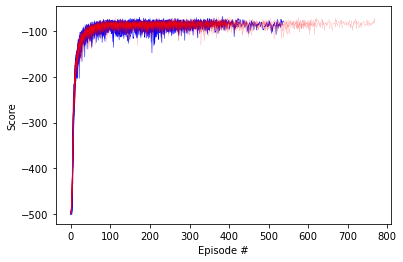

Details of Case 1 (+Q +E +T)
Mean
2837.45
Std Dev
990.4248318272316


Details of Case 2 (+Q +E -T)
Mean
3978.5
Std Dev
1271.5040896513074


In [41]:
#sibling_scores1 
#sibling_lives1

'''
Comparing Case 1 (+Q +E +T) & Case 2 (+Q +E -T)
'''

no_siblings = 20

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores1[i])), sibling_scores1[i],color='blue', linewidth=0.5)

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores2[i])), sibling_scores2[i],color='red', linewidth=0.1)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()  


print('Details of Case 1 (+Q +E +T)')
print('Mean')
print(np.mean(sibling_lives1))
print('Std Dev')
print(np.std(sibling_lives1))
print('\n')


print('Details of Case 2 (+Q +E -T)')
print('Mean')
print(np.mean(sibling_lives2))
print('Std Dev')
print(np.std(sibling_lives2))


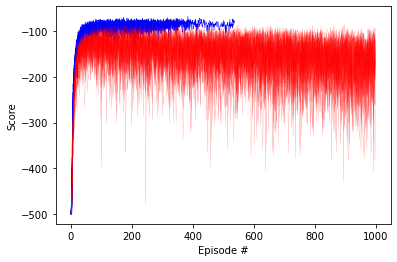

Details of Case 1 (+Q +E +T)
Mean
2837.45
Std Dev
990.4248318272316


Details of Case 3 (+Q -E +T)
Mean
9900.0
Std Dev
0.0


In [42]:
'''
Comparing Case 1 (+Q +E +T) & Case 3 (+Q -E +T)
'''

no_siblings = 20

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores1[i])), sibling_scores1[i],color='blue', linewidth=0.5)

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores3[i])), sibling_scores3[i],color='red', linewidth=0.1)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()  


print('Details of Case 1 (+Q +E +T)')
print('Mean')
print(np.mean(sibling_lives1))
print('Std Dev')
print(np.std(sibling_lives1))
print('\n')


print('Details of Case 3 (+Q -E +T)')
print('Mean')
print(np.mean(sibling_lives3))
print('Std Dev')
print(np.std(sibling_lives3))

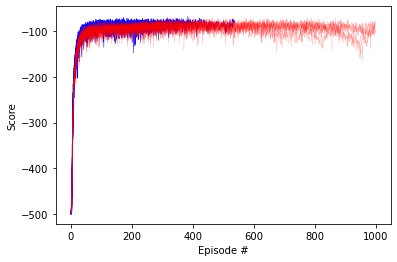

Details of Case 1 (+Q +E +T)
Mean
2837.45
Std Dev
990.4248318272316


Details of Case 5 (-Q +E +T)
Mean
6461.2
Std Dev
2432.3824658141243


In [43]:
'''
Comparing Case 1 (+Q +E +T) & Case 5 (-Q +E +T)
'''

no_siblings = 20

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores1[i])), sibling_scores1[i],color='blue', linewidth=0.5)

for i in range(no_siblings):
    plt.plot(np.arange(len(sibling_scores5[i])), sibling_scores5[i],color='red', linewidth=0.1)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()  


print('Details of Case 1 (+Q +E +T)')
print('Mean')
print(np.mean(sibling_lives1))
print('Std Dev')
print(np.std(sibling_lives1))
print('\n')


print('Details of Case 5 (-Q +E +T)')
print('Mean')
print(np.mean(sibling_lives5))
print('Std Dev')
print(np.std(sibling_lives5))

In [46]:
'''
Comparing all cases
'''

print('Details of Case 1 (+Q +E +T)')
print('Mean')
print(np.mean(sibling_lives1))
print('Std Dev')
print(np.std(sibling_lives1))
print('\n')

print('Details of Case 2 (+Q +E -T)')
print('Mean')
print(np.mean(sibling_lives2))
print('Std Dev')
print(np.std(sibling_lives2))
print('\n')

print('Details of Case 3 (+Q -E +T)')
print('Mean')
print(np.mean(sibling_lives3))
print('Std Dev')
print(np.std(sibling_lives3))
print('\n')

print('Details of Case 4 (+Q -E -T)')
print('Mean')
print(np.mean(sibling_lives4))
print('Std Dev')
print(np.std(sibling_lives4))
print('\n')

print('Details of Case 5 (-Q +E +T)')
print('Mean')
print(np.mean(sibling_lives5))
print('Std Dev')
print(np.std(sibling_lives5))
print('\n')

print('Details of Case 6 (-Q +E -T)')
print('Mean')
print(np.mean(sibling_lives6))
print('Std Dev')
print(np.std(sibling_lives6))
print('\n')


Details of Case 1 (+Q +E +T)
Mean
2837.45
Std Dev
990.4248318272316


Details of Case 2 (+Q +E -T)
Mean
3978.5
Std Dev
1271.5040896513074


Details of Case 3 (+Q -E +T)
Mean
9900.0
Std Dev
0.0


Details of Case 4 (+Q -E -T)
Mean
9900.0
Std Dev
0.0


Details of Case 5 (-Q +E +T)
Mean
6461.2
Std Dev
2432.3824658141243


Details of Case 6 (-Q +E -T)
Mean
4545.3
Std Dev
896.0968753432857




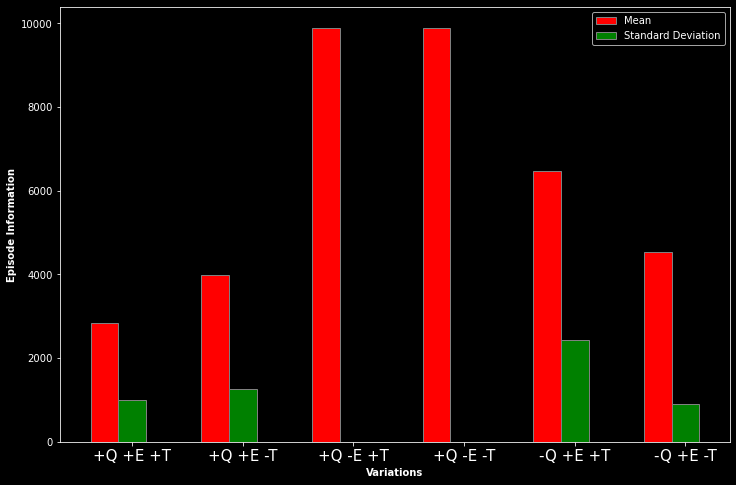

In [68]:
plt.style.use('dark_background')

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
episodes_mean = [np.mean(sibling_lives1),np.mean(sibling_lives2),np.mean(sibling_lives3),np.mean(sibling_lives4),np.mean(sibling_lives5),np.mean(sibling_lives6)]
episodes_std = [np.std(sibling_lives1),np.std(sibling_lives2),np.std(sibling_lives3),np.std(sibling_lives4),np.std(sibling_lives5),np.std(sibling_lives6)]
 
# Set position of bar on X axis
br1 = np.arange(6)
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, episodes_mean, color ='r', width = barWidth,
        edgecolor ='grey', label ='Mean')
plt.bar(br2, episodes_std, color ='g', width = barWidth,
        edgecolor ='grey', label ='Standard Deviation')
 
# Adding Xticks
plt.xlabel('Variations', fontweight ='bold', fontsize = 10,color='w')
plt.ylabel('Episode Information', fontweight ='bold', fontsize = 10,color='w')
plt.xticks([r + barWidth for r in range(6)],
        ['+Q +E +T','+Q +E -T','+Q -E +T','+Q -E -T','-Q +E +T','-Q +E -T'],fontsize = 15,color='w')
 
plt.legend()
plt.show()

In [72]:
import hickle as hkl
# write variables to filename [a,b,c can be of any size]
hkl.dump([sibling_lives1,sibling_lives2,sibling_lives3,sibling_lives4,sibling_lives5,sibling_lives6,sibling_scores1,sibling_scores2,sibling_scores3,sibling_scores4,sibling_scores5,sibling_scores6], 'SiblingVariables')

# load variables from filename
#a,b,c = hkl.load(filename)